# Data Cleaning

## Find missing data

In [191]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (Replace 'your_file.csv' with an actual CSV file)
df = pd.read_csv("Vehicle_Risk_Data_(train set).csv")
print(df.head())
print("\nMissing values before filling:\n", df.isnull().sum())


   Unnamed: 0        Time_Recorded   CarID    Price   manufacturer  \
0        1608  2019-12-16 04:26:41  Car642  14050.0          Raven   
1         173  2020-08-24 12:28:19  Car992  10934.0          AtlaS   
2         463  2022-08-27 20:34:59  Car392   7257.0          Prism   
3        2354  2018-09-23 13:20:57  Car950   7003.0  Phoenix drive   
4        1965  2023-12-23 06:27:44  Car437  16293.0          Raven   

          Origin  FE_HW  FE_UR  rpm-max  Horsepower  ...  Length  Wheel_Base  \
0          Japan     39     31   5170.0        74.0  ...   167.5        96.2   
1          Japan     27     17   5407.0       145.0  ...   161.2        95.9   
2  United States     28     25   4927.0       132.0  ...   180.6        99.2   
3          Italy     34     19   5021.0       137.0  ...   160.7        97.3   
4          Japan     28     20   5312.0       109.0  ...   183.9       102.6   

   Engine-loc Drive-wheels-type  vehicle_cat  doors_num aspiration  fuel  \
0       front         

In [193]:
print(df['vehicle_cat'].unique())

['sedan' 'hatchback' 'hatch back' 'wagon' 'hardtop' 'convertible'
 'hard top']


In [195]:
df.loc[:, 'vehicle_cat'] = df['vehicle_cat'].replace('hatch back', 'hatchback')

In [197]:
df.loc[:, 'vehicle_cat'] = df['vehicle_cat'].replace('hard top', 'hardtop')

In [199]:
print(df['vehicle_cat'].unique())

['sedan' 'hatchback' 'wagon' 'hardtop' 'convertible']


In [201]:
df.fillna({'Price': df['Price'].median(),
           'rpm-max': df['rpm-max'].mean(),
           'Horsepower': df['Horsepower'].median(),
           'Stroke': df['Stroke'].mean()}, inplace=True)

df['Bore'] = df.groupby(['vehicle_cat', 'fuel'])['Bore'].transform(lambda x: x.fillna(x.median()))
df['normalized-losses'] = df.groupby(['manufacturer', 'vehicle_cat'])['normalized-losses'].transform(
    lambda x: x.fillna(x.median())
)
df['normalized-losses'].fillna(df['normalized-losses'].median(), inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_22976\1531866227.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['normalized-losses'].fillna(df['normalized-losses'].median(), inplace=True)


In [203]:
print("\nMissing values after filling:\n", df.isnull().sum())


Missing values after filling:
 Unnamed: 0           0
Time_Recorded        0
CarID                0
Price                0
manufacturer         0
Origin               0
FE_HW                0
FE_UR                0
rpm-max              0
Horsepower           0
comp_ratio           0
Stroke               0
Bore                 0
fuel_system          0
Engine-size          0
cylinders_num        0
Engine-type          0
Curb-weight          0
Height               0
Width                0
Length               0
Wheel_Base           0
Engine-loc           0
Drive-wheels-type    0
vehicle_cat          0
doors_num            0
aspiration           0
fuel                 0
Symboling            0
normalized-losses    0
dtype: int64


     Price Price_Category
0  14050.0              1
1  10934.0              0
2   7257.0              0
3   7003.0              0
4  16293.0              1
count     2038
unique       3
top          0
freq      1130
Name: Price_Category, dtype: int64


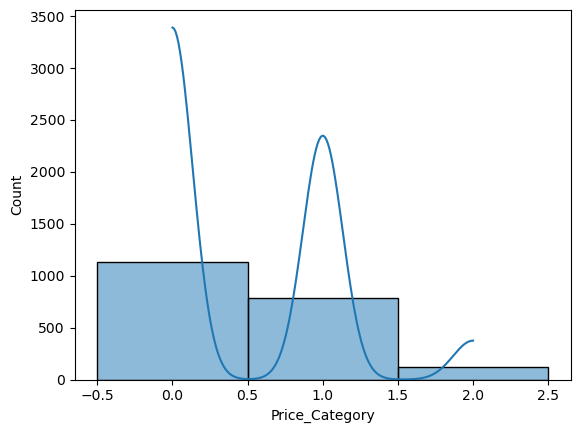

In [205]:
import pandas as pd

# Define bins and labels
bins = [0, 12000, 25000, 47000]  # Adjust based on your data range
labels = [0, 1, 2]

# Create new binned column
df["Price_Category"] = pd.cut(df["Price"], bins=bins, labels=labels)

# Check the results
print(df[["Price", "Price_Category"]].head())

print(df['Price_Category'].describe())

# Plot distribution of rpm-max
sns.histplot(df['Price_Category'], bins=30, kde=True)
plt.show()

   Horsepower Horsepower_Category
0        74.0                   0
1       145.0                   1
2       132.0                   1
3       137.0                   1
4       109.0                   1
count     2038
unique       3
top          0
freq       986
Name: Horsepower_Category, dtype: int64


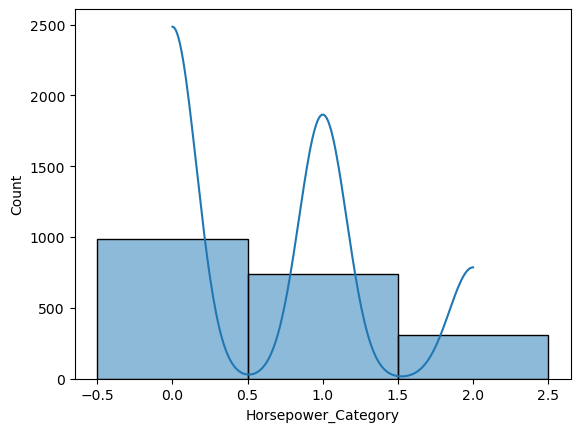

In [207]:
import pandas as pd

# Define bin edges and labels
bins = [0, 100, 150, 250]  # Adjust based on data range
labels = [0, 1, 2]

# Apply binning
df["Horsepower_Category"] = pd.cut(df["Horsepower"], bins=bins, labels=labels)

# Check the result
print(df[["Horsepower", "Horsepower_Category"]].head())

print(df['Horsepower_Category'].describe())

# Plot distribution of rpm-max
sns.histplot(df['Horsepower_Category'], bins=30, kde=True)
plt.show()

   Engine-size Engine_Size_Category
0          137                    1
1          112                    0
2          109                    0
3          103                    0
4          167                    1
count     2038
unique       3
top          0
freq      1286
Name: Engine_Size_Category, dtype: int64


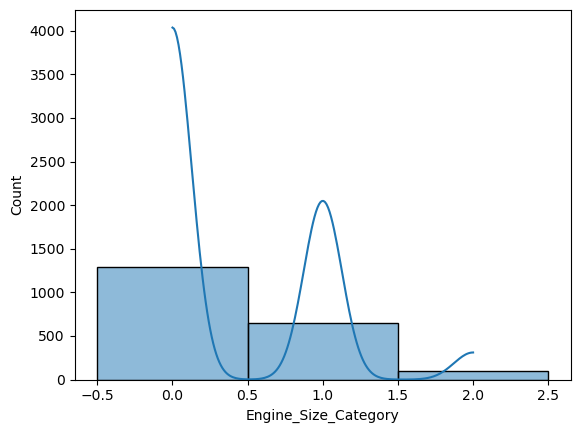

In [209]:
import pandas as pd

# Define bin edges and labels
bins = [0, 130, 180, 350]  # Adjust based on the data range
labels = [0, 1, 2]

# Apply binning
df["Engine_Size_Category"] = pd.cut(df["Engine-size"], bins=bins, labels=labels)

# Check the result
print(df[["Engine-size", "Engine_Size_Category"]].head())

print(df['Engine_Size_Category'].describe())

# Plot distribution of rpm-max
sns.histplot(df['Engine_Size_Category'], bins=30, kde=True)
plt.show()

   Width Width_Category
0   65.7              1
1   69.8              2
2   66.6              1
3   66.6              1
4   70.1              2
count     2038
unique       3
top          1
freq      1105
Name: Width_Category, dtype: int64


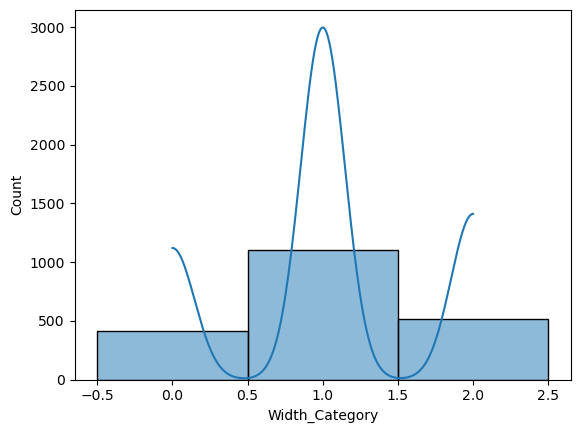

In [211]:
import pandas as pd

# Define bin edges and labels
bins = [60, 64, 67, 73]  # Adjust based on observed range
labels = [0, 1, 2]

# Apply binning
df["Width_Category"] = pd.cut(df["Width"], bins=bins, labels=labels)

# Check the result
print(df[["Width", "Width_Category"]].head())

print(df['Width_Category'].describe())

# Plot distribution of rpm-max
sns.histplot(df['Width_Category'], bins=30, kde=True)
plt.show()

   Length Length_Category
0   167.5               1
1   161.2               0
2   180.6               2
3   160.7               0
4   183.9               2
count     2038
unique       3
top          1
freq      1027
Name: Length_Category, dtype: int64


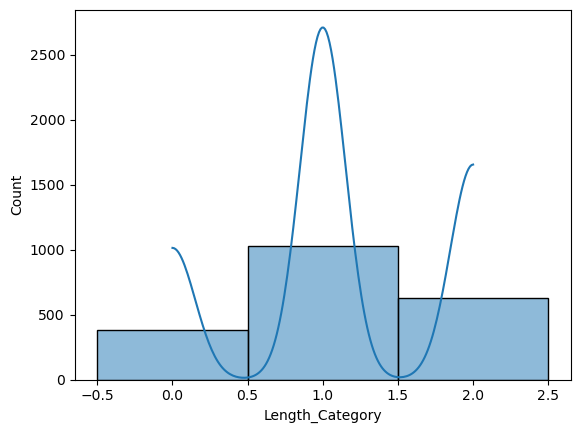

In [212]:
import pandas as pd

# Define bin edges and labels
bins = [140, 165, 180, 210]  # Adjust based on observed range
labels = [0, 1, 2]

# Apply binning
df["Length_Category"] = pd.cut(df["Length"], bins=bins, labels=labels)

# Check the result
print(df[["Length", "Length_Category"]].head())

print(df['Length_Category'].describe())

# Plot distribution of rpm-max
sns.histplot(df['Length_Category'], bins=30, kde=True)
plt.show()

   Curb-weight CurbWeight_Category
0         2471                   1
1         2359                   1
2         2918                   2
3         2216                   1
4         3082                   2
count     2038
unique       3
top          2
freq       841
Name: CurbWeight_Category, dtype: int64


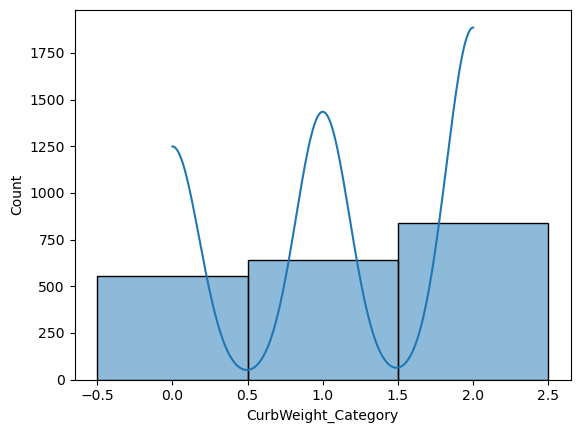

In [215]:
import pandas as pd

# Define bin edges and labels
bins = [1500, 2200, 2800, 3800]  # Adjust based on observed range
labels = [0, 1, 2]

# Apply binning
df["CurbWeight_Category"] = pd.cut(df["Curb-weight"], bins=bins, labels=labels)

# Check the result
print(df[["Curb-weight", "CurbWeight_Category"]].head())

print(df['CurbWeight_Category'].describe())

# Plot distribution of rpm-max
sns.histplot(df['CurbWeight_Category'], bins=30, kde=True)
plt.show()

In [217]:
print(df)

      Unnamed: 0        Time_Recorded   CarID    Price   manufacturer  \
0           1608  2019-12-16 04:26:41  Car642  14050.0          Raven   
1            173  2020-08-24 12:28:19  Car992  10934.0          AtlaS   
2            463  2022-08-27 20:34:59  Car392   7257.0          Prism   
3           2354  2018-09-23 13:20:57  Car950   7003.0  Phoenix drive   
4           1965  2023-12-23 06:27:44  Car437  16293.0          Raven   
...          ...                  ...     ...      ...            ...   
2033        1238  2018-07-06 16:34:27  Car619  17451.0         zenith   
2034        2169  2021-03-18 16:45:47  Car358  15419.0          atlas   
2035        1130  2019-05-09 12:51:54  Car167  14758.0         zenith   
2036        1294  2019-02-17 00:20:41  Car113   7182.0          helix   
2037         860  2019-04-25 11:59:22  Car619   6554.0          velox   

             Origin  FE_HW  FE_UR  rpm-max  Horsepower  ...  aspiration  fuel  \
0             Japan     39     31   5170.0

In [219]:
print("\nMissing values before filling:\n", df.isnull().sum())



Missing values before filling:
 Unnamed: 0              0
Time_Recorded           0
CarID                   0
Price                   0
manufacturer            0
Origin                  0
FE_HW                   0
FE_UR                   0
rpm-max                 0
Horsepower              0
comp_ratio              0
Stroke                  0
Bore                    0
fuel_system             0
Engine-size             0
cylinders_num           0
Engine-type             0
Curb-weight             0
Height                  0
Width                   0
Length                  0
Wheel_Base              0
Engine-loc              0
Drive-wheels-type       0
vehicle_cat             0
doors_num               0
aspiration              0
fuel                    0
Symboling               0
normalized-losses       0
Price_Category          0
Horsepower_Category     0
Engine_Size_Category    0
Width_Category          0
Length_Category         0
CurbWeight_Category     0
dtype: int64


   Curb-weight CurbWeight_Category
0         2471                   1
1         2359                   1
2         2918                   2
3         2216                   1
4         3082                   2
count     2038
unique       3
top          2
freq       841
Name: CurbWeight_Category, dtype: int64


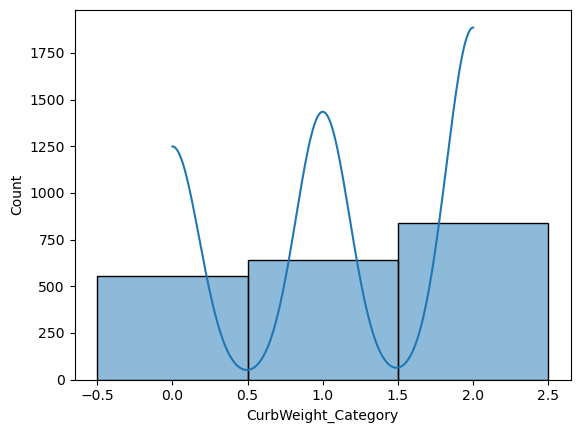

In [221]:
import pandas as pd

# Define bin edges and labels
bins = [1500, 2200, 2800, 3800]  # Adjust based on observed range
labels = [0, 1, 2]

# Apply binning
df["CurbWeight_Category"] = pd.cut(df["Curb-weight"], bins=bins, labels=labels)

# Check the result
print(df[["Curb-weight", "CurbWeight_Category"]].head())

print(df['CurbWeight_Category'].describe())

# Plot distribution of rpm-max
sns.histplot(df['CurbWeight_Category'], bins=30, kde=True)
plt.show()

In [223]:
print(df['vehicle_cat'].unique())

['sedan' 'hatchback' 'wagon' 'hardtop' 'convertible']


     vehicle_cat  vehicle_rank
0          sedan             0
1      hatchback             4
2      hatchback             4
3      hatchback             4
4          sedan             0
...          ...           ...
2033       sedan             0
2034   hatchback             4
2035       sedan             0
2036   hatchback             4
2037       sedan             0

[2038 rows x 2 columns]
vehicle_rank
0    1001
4     736
2     275
5      26
Name: count, dtype: int64


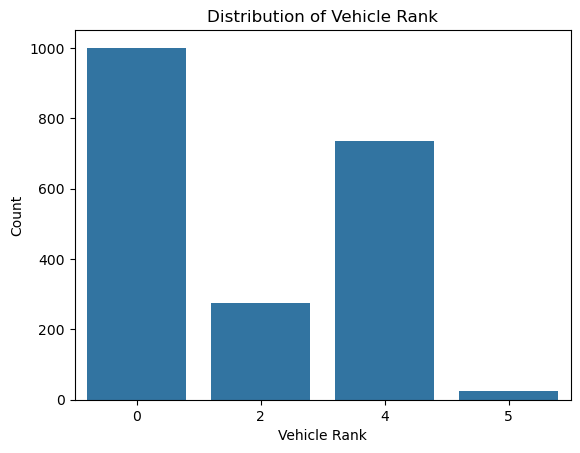

In [225]:
import pandas as pd
import seaborn as snsa
import matplotlib.pyplot as plt

# Define Binning (Mapping Categories to Ranks)
vehicle_bins = {
    "convertible": 5,  # Extreme Risk
    "hardtop": 4,      # Higher Risk
    "hatchback": 4,    # Higher Risk
    "sedan": 0,        # Ultra Safe
    "wagon": 2         # Safe
}

# Apply Mapping
df["vehicle_rank"] = df["vehicle_cat"].map(vehicle_bins)

# Check the result
print(df[["vehicle_cat", "vehicle_rank"]])
print(df["vehicle_rank"].value_counts())

# Plot Distribution of Vehicle Rank
sns.countplot(x=df["vehicle_rank"], order=sorted(df["vehicle_rank"].unique()))

plt.xlabel("Vehicle Rank")
plt.ylabel("Count")
plt.title("Distribution of Vehicle Rank")
plt.show()


In [149]:
print(df)

      Unnamed: 0        Time_Recorded   CarID    Price   manufacturer  \
0           1608  2019-12-16 04:26:41  Car642  14050.0          Raven   
1            173  2020-08-24 12:28:19  Car992  10934.0          AtlaS   
2            463  2022-08-27 20:34:59  Car392   7257.0          Prism   
3           2354  2018-09-23 13:20:57  Car950   7003.0  Phoenix drive   
4           1965  2023-12-23 06:27:44  Car437  16293.0          Raven   
...          ...                  ...     ...      ...            ...   
2033        1238  2018-07-06 16:34:27  Car619  17451.0         zenith   
2034        2169  2021-03-18 16:45:47  Car358  15419.0          atlas   
2035        1130  2019-05-09 12:51:54  Car167  14758.0         zenith   
2036        1294  2019-02-17 00:20:41  Car113   7182.0          helix   
2037         860  2019-04-25 11:59:22  Car619   6554.0          velox   

             Origin  FE_HW  FE_UR  rpm-max  Horsepower  ...  doors_num  \
0             Japan     39     31   5170.0       

In [228]:
df = pd.read_csv("Vehicle_Risk_Data_(train set).csv")
print(df['Drive-wheels-type'].unique())


['fwd' 'rwd' '4wd']


     Drive-wheels-type  wheel_rank
0                  fwd           3
1                  rwd           4
2                  fwd           3
3                  rwd           4
4                  fwd           3
...                ...         ...
2033               rwd           4
2034               rwd           4
2035               rwd           4
2036               fwd           3
2037               fwd           3

[2038 rows x 2 columns]
wheel_rank
3    1129
4     877
2      32
Name: count, dtype: int64


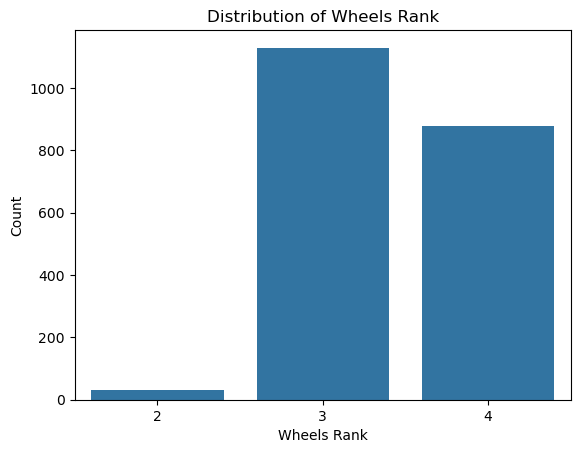

In [230]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample Data

# Define Binning (Mapping Categories to Ranks)
wheels_bins = {
    "rwd": 4,      # Higher Risk
    "fwd": 3,  # Moderate Risk
    "4wd": 2   # Safe
 
}

# Apply Mapping
df["wheel_rank"] = df["Drive-wheels-type"].map(wheels_bins)

# Check the result
print(df[["Drive-wheels-type", "wheel_rank"]])
print(df["wheel_rank"].value_counts())

# Plot Distribution of Vehicle Rank
sns.countplot(x=df["wheel_rank"], order=sorted(df["wheel_rank"].unique()))

plt.xlabel("Wheels Rank")
plt.ylabel("Count")
plt.title("Distribution of Wheels Rank")
plt.show()


In [232]:
df.to_csv("cleaned_data_train_bins(2).csv", index=False)

In [234]:
print(df)

      Unnamed: 0        Time_Recorded   CarID    Price   manufacturer  \
0           1608  2019-12-16 04:26:41  Car642  14050.0          Raven   
1            173  2020-08-24 12:28:19  Car992  10934.0          AtlaS   
2            463  2022-08-27 20:34:59  Car392   7257.0          Prism   
3           2354  2018-09-23 13:20:57  Car950   7003.0  Phoenix drive   
4           1965  2023-12-23 06:27:44  Car437  16293.0          Raven   
...          ...                  ...     ...      ...            ...   
2033        1238  2018-07-06 16:34:27  Car619  17451.0         zenith   
2034        2169  2021-03-18 16:45:47  Car358  15419.0          atlas   
2035        1130  2019-05-09 12:51:54  Car167  14758.0         zenith   
2036        1294  2019-02-17 00:20:41  Car113   7182.0          helix   
2037         860  2019-04-25 11:59:22  Car619   6554.0          velox   

             Origin  FE_HW  FE_UR  rpm-max  Horsepower  ...  Wheel_Base  \
0             Japan     39     31   5170.0      

In [236]:
df.to_csv("cleaned_data_train_bins(2).csv", index=False)

# Visualization

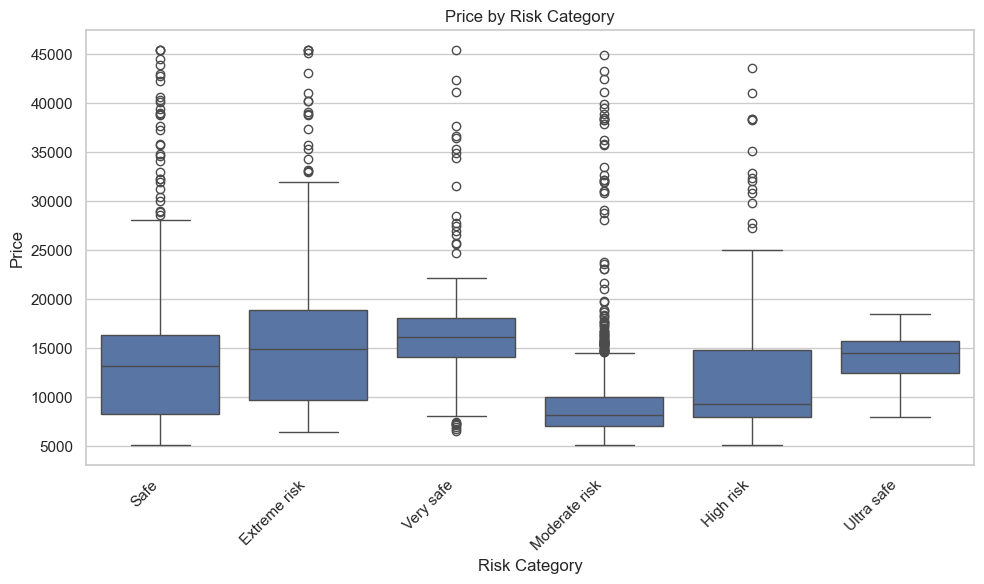

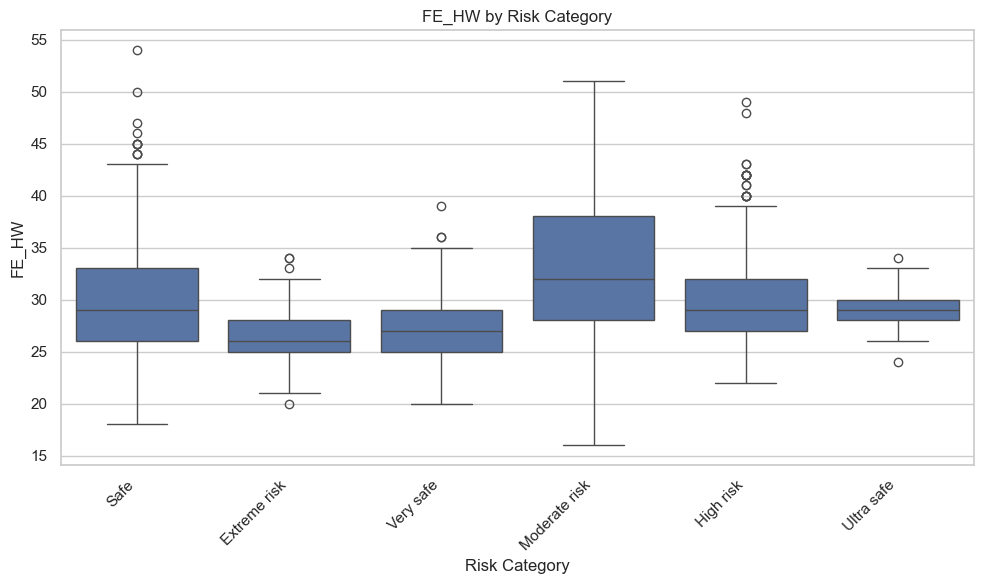

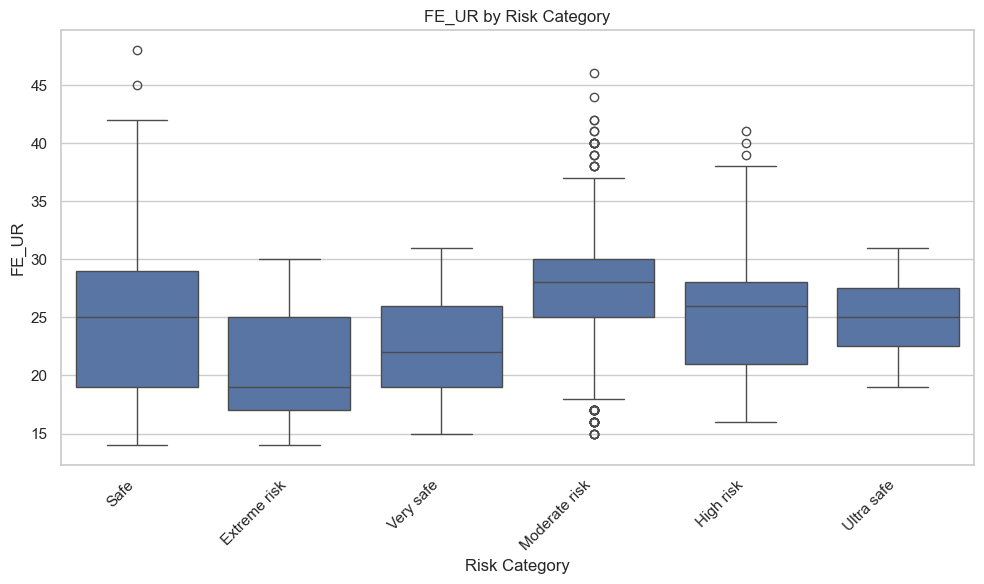

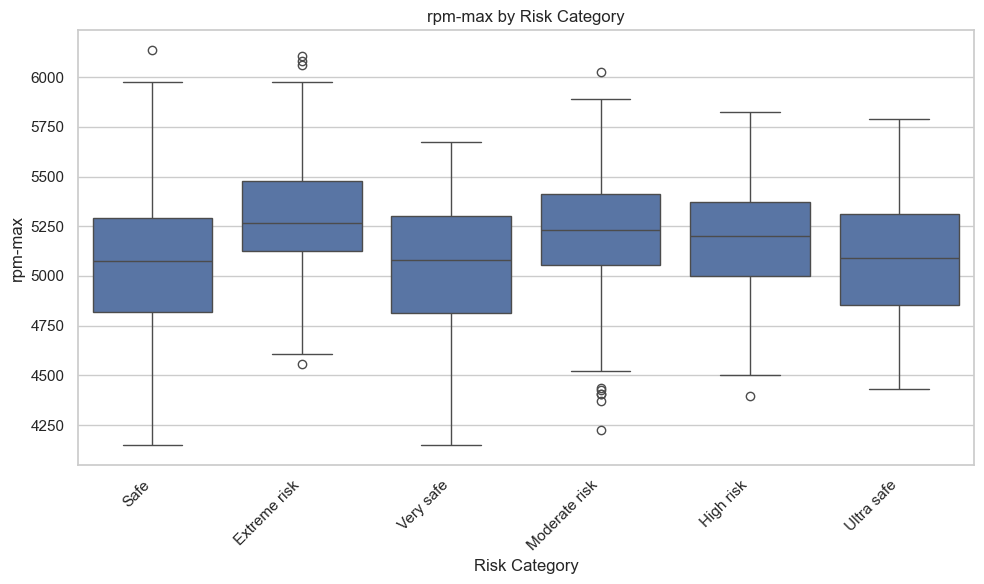

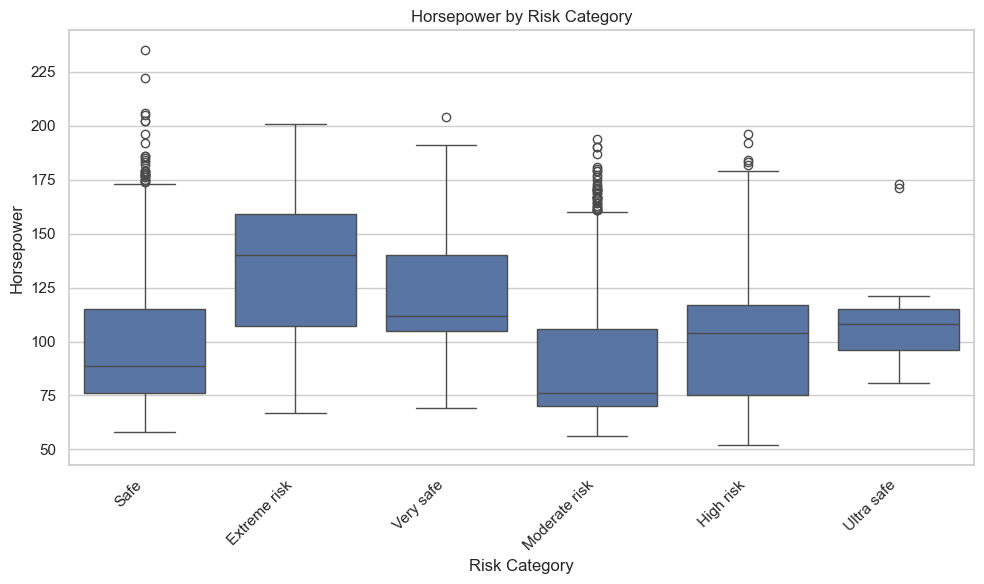

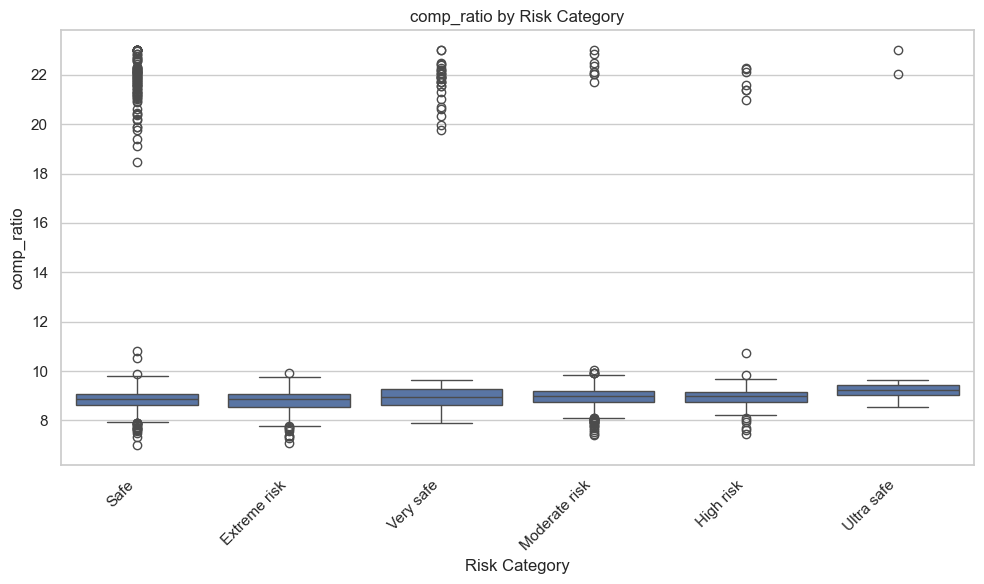

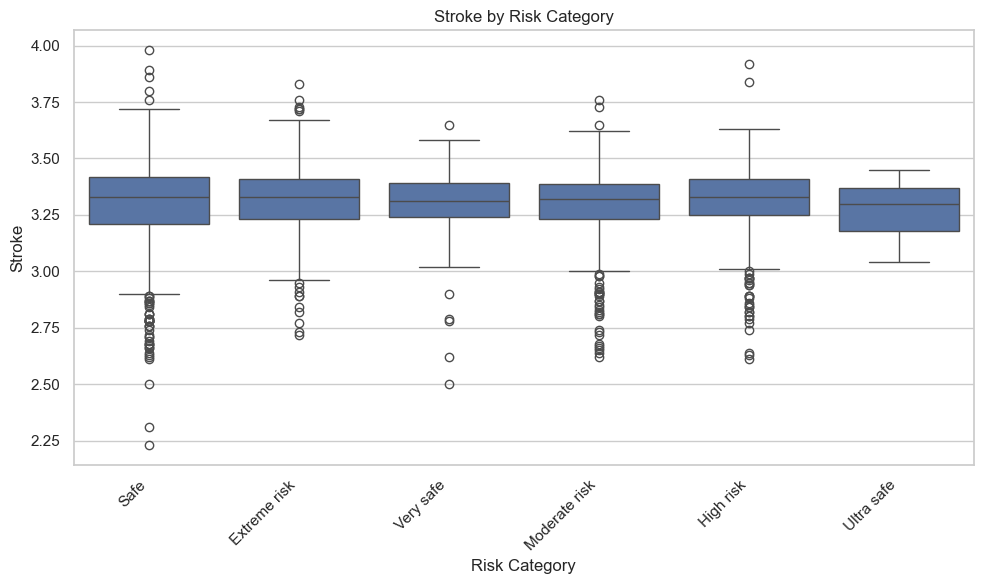

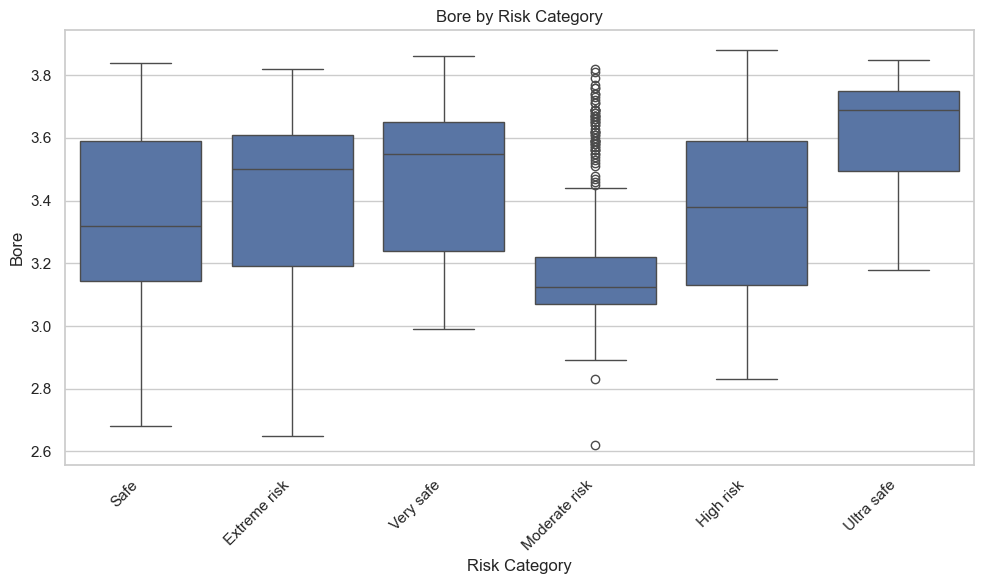

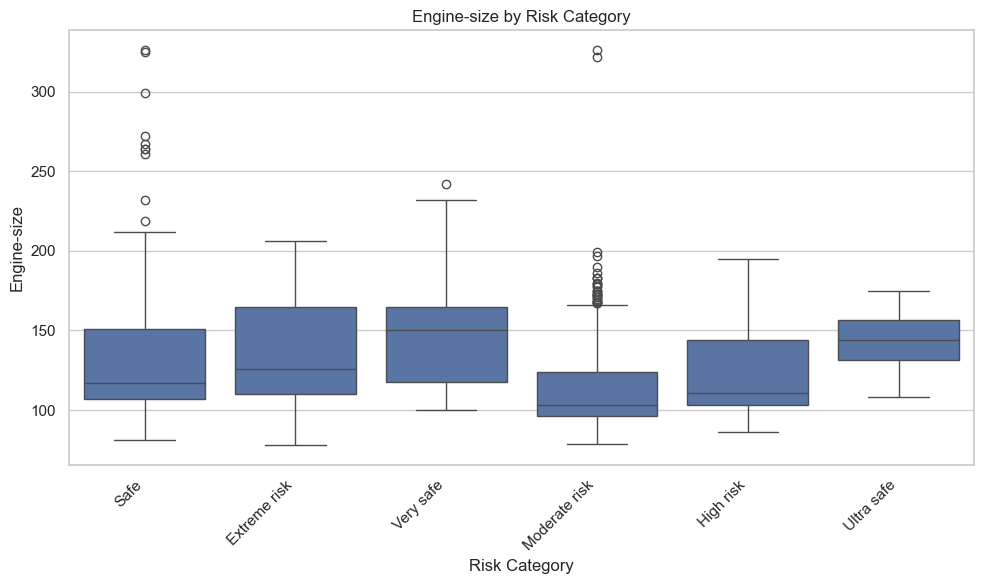

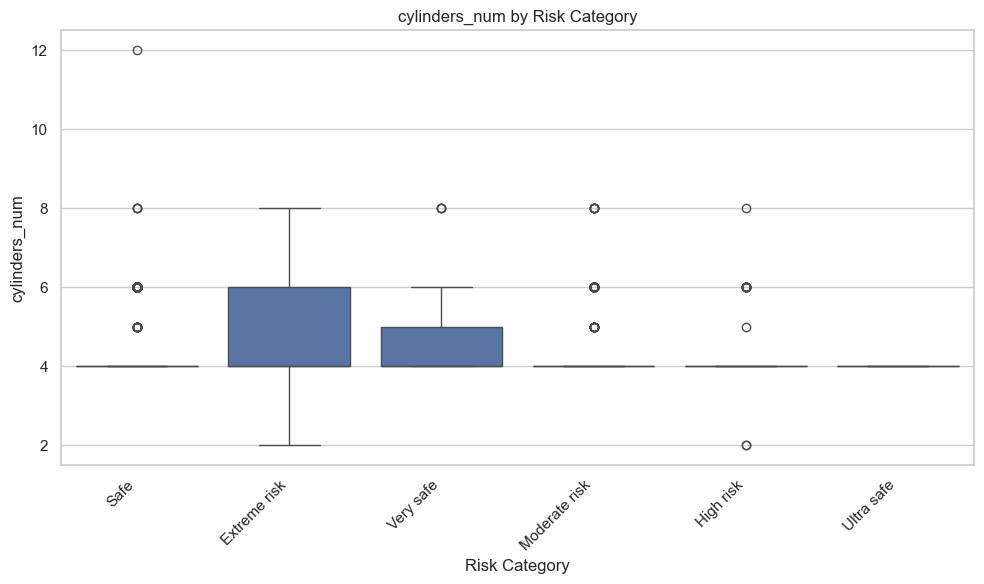

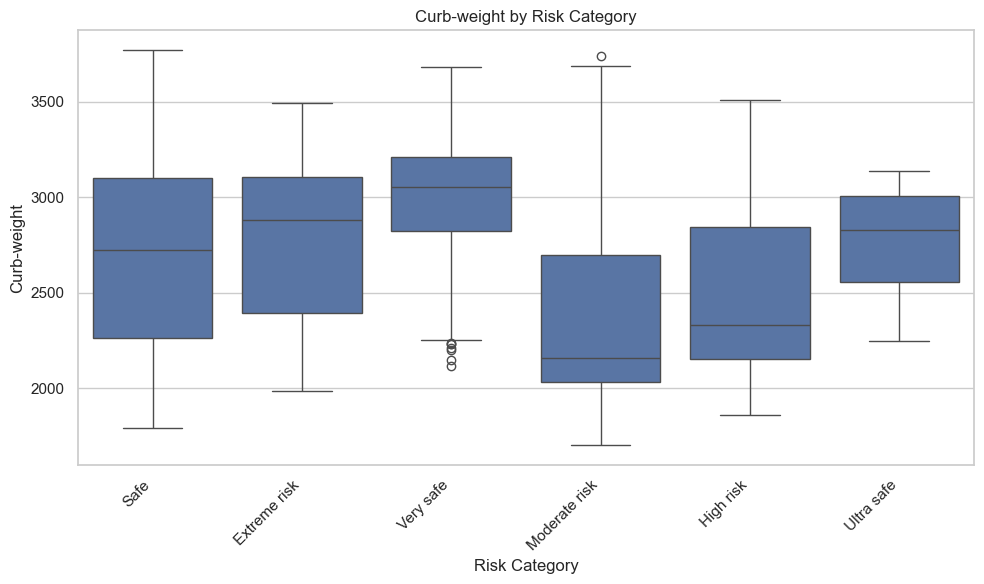

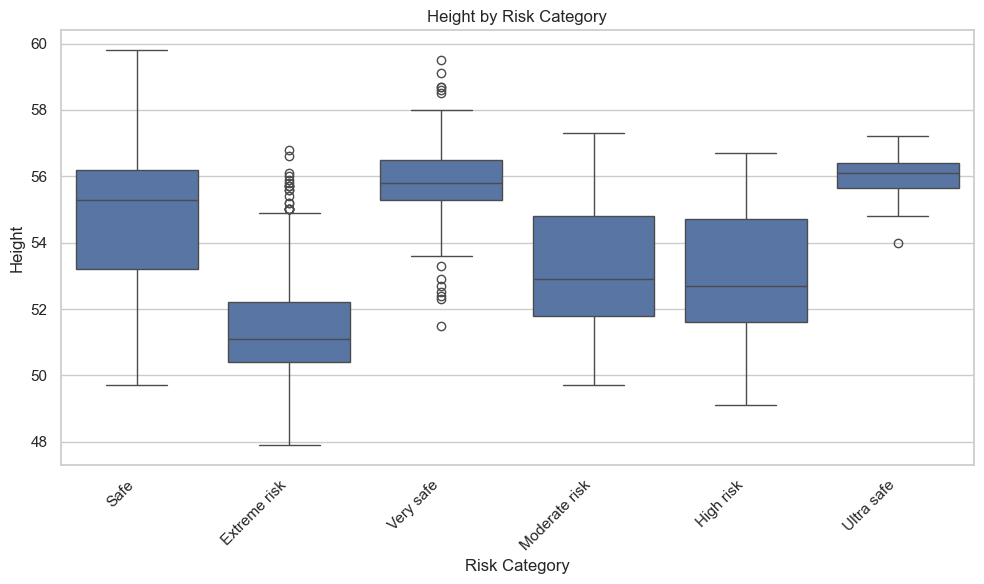

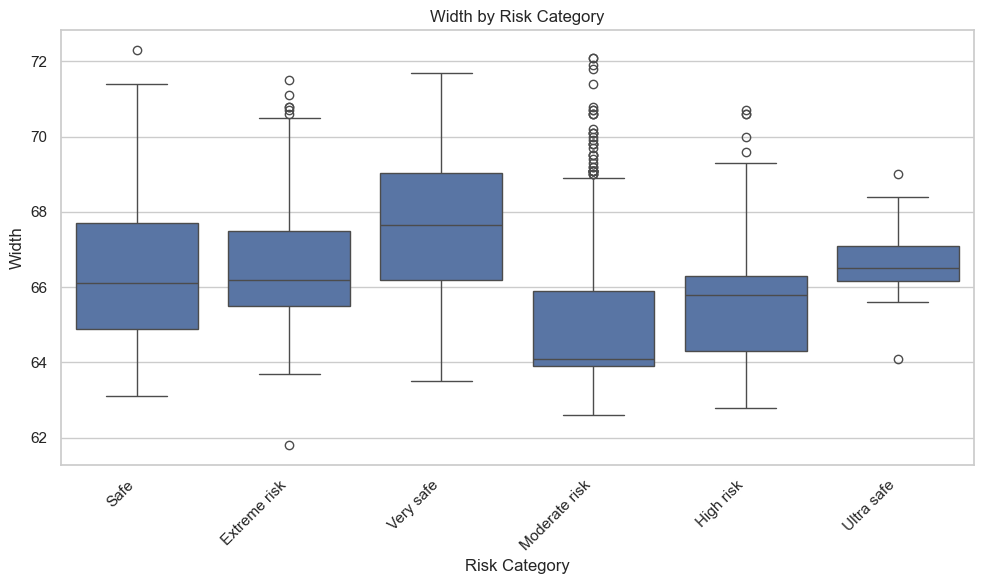

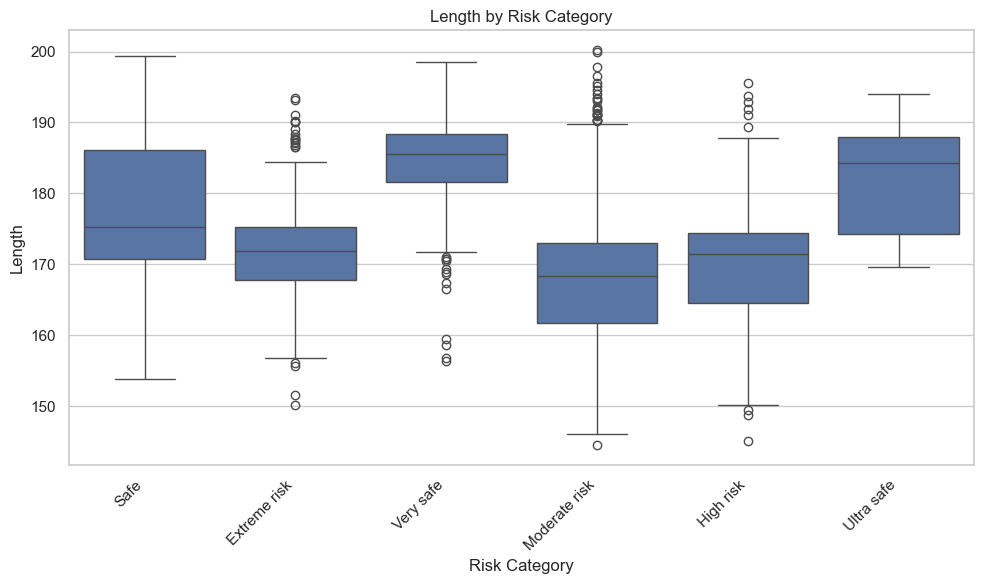

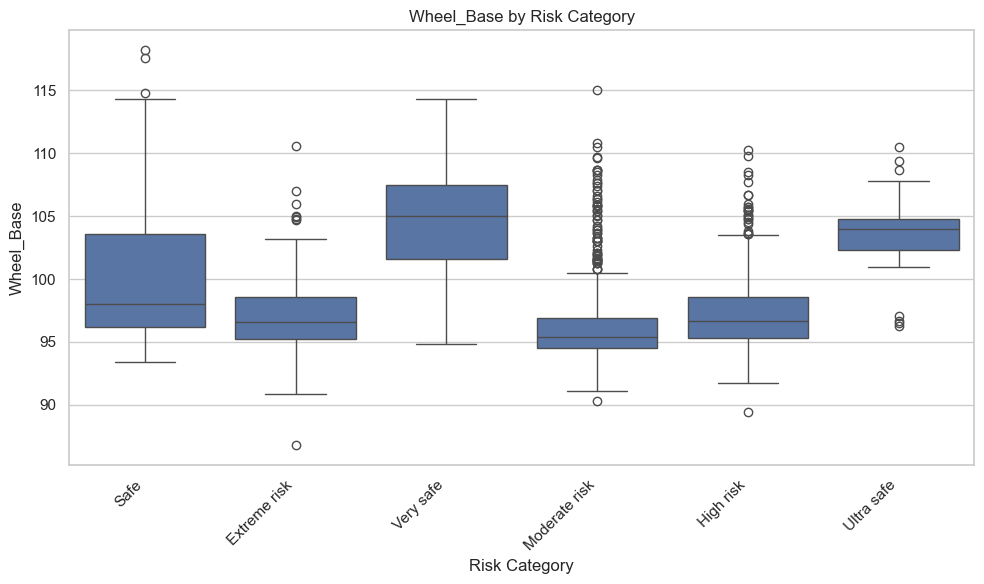

C:\Users\user\AppData\Local\Temp\ipykernel_22976\503987051.py:57: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1200x600 with 0 Axes>

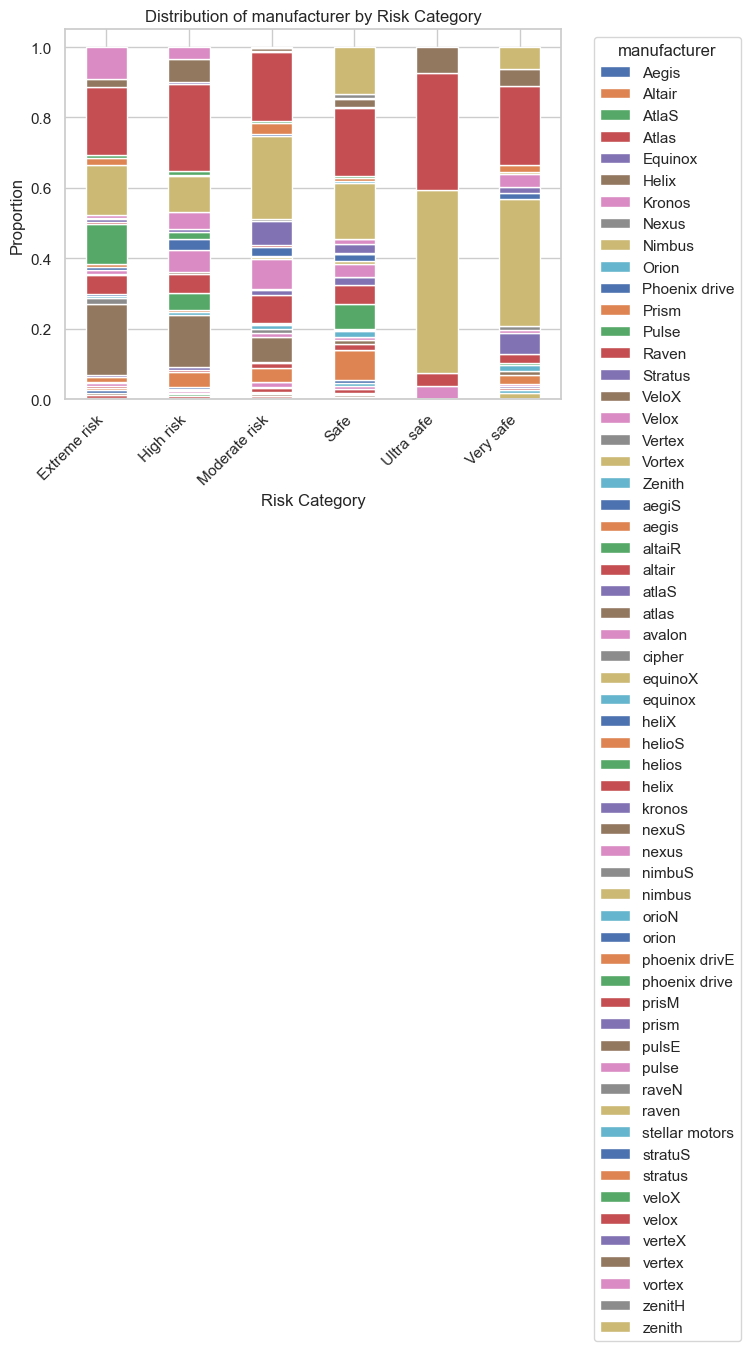

<Figure size 1200x600 with 0 Axes>

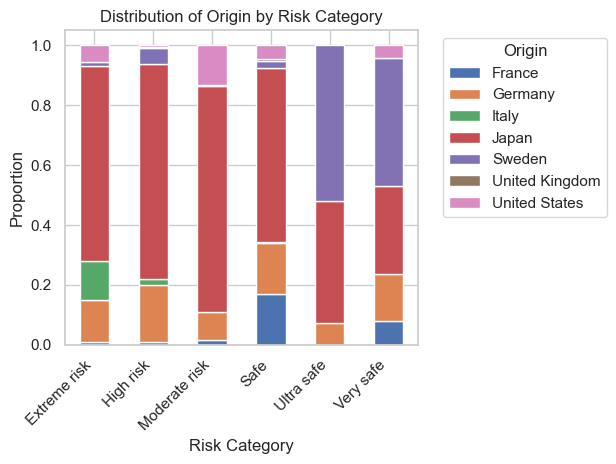

<Figure size 1200x600 with 0 Axes>

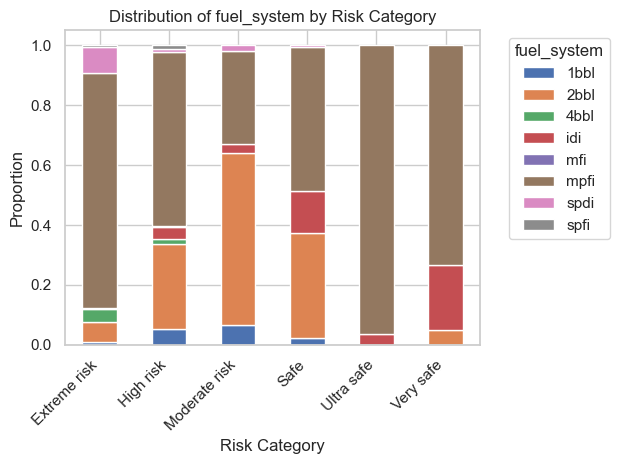

<Figure size 1200x600 with 0 Axes>

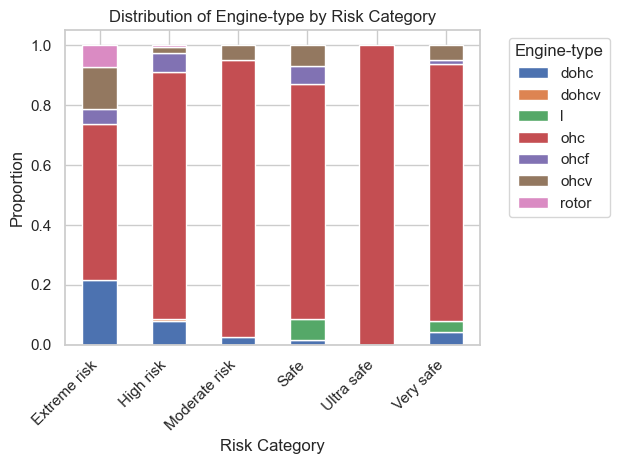

<Figure size 1200x600 with 0 Axes>

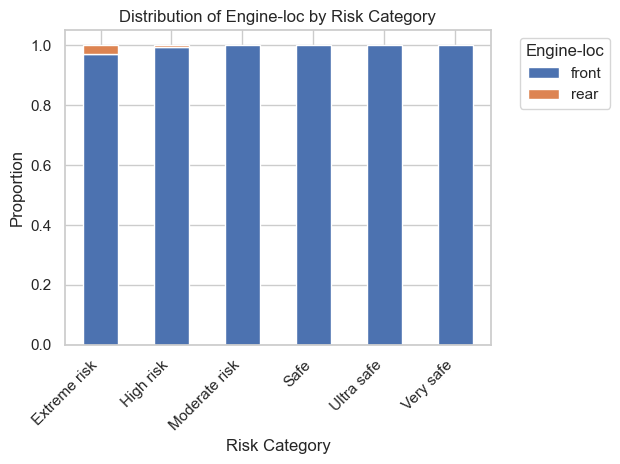

<Figure size 1200x600 with 0 Axes>

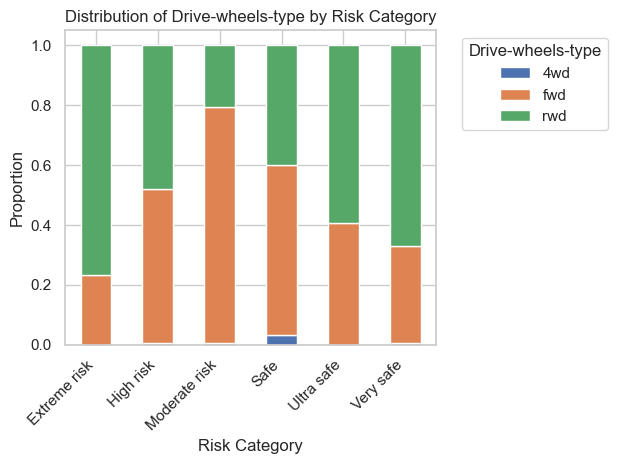

<Figure size 1200x600 with 0 Axes>

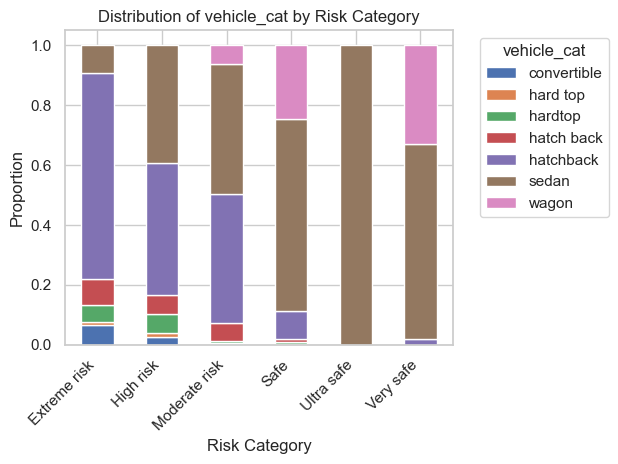

<Figure size 1200x600 with 0 Axes>

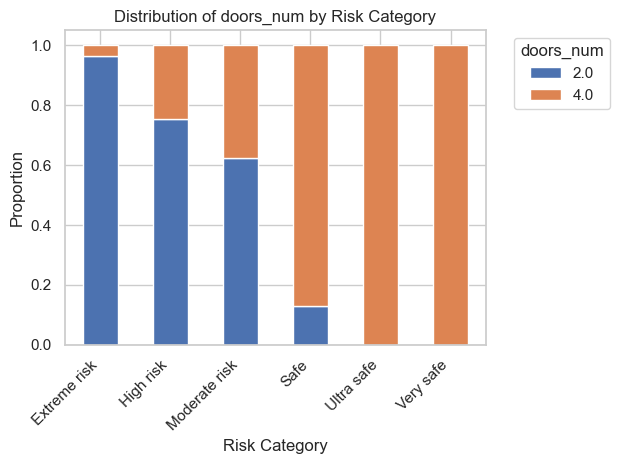

<Figure size 1200x600 with 0 Axes>

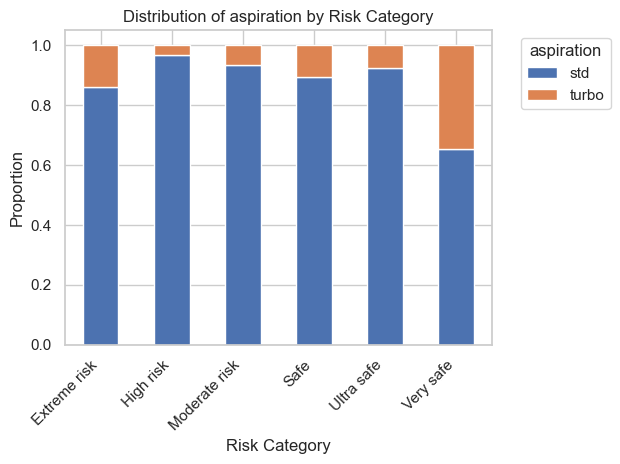

<Figure size 1200x600 with 0 Axes>

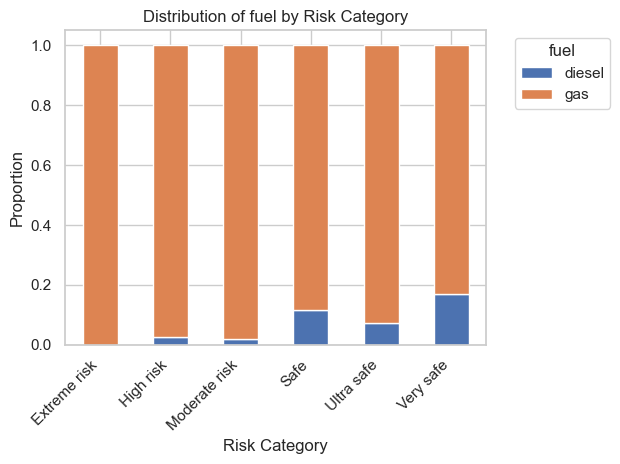

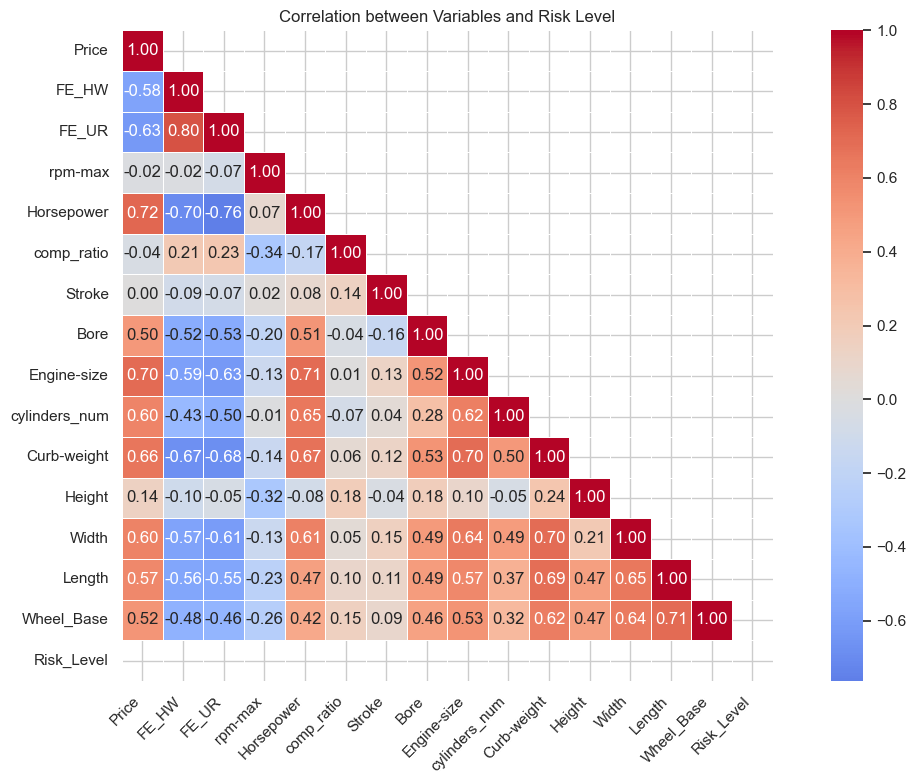


Summary Statistics by Risk Category:
                  Price          Horsepower        Engine-size         \
                   mean      std       mean    std        mean    std   
Symboling                                                               
Extreme risk   16270.02  8577.43     135.45  31.97      136.69  31.58   
High risk      11982.91  6583.14     103.77  32.33      122.96  26.23   
Moderate risk  10519.94  6893.58      91.74  33.05      113.82  28.68   
Safe           13451.37  6789.26     101.38  33.24      129.67  32.88   
Ultra safe     13929.70  2773.16     108.52  21.63      141.78  19.26   
Very safe      16905.97  6886.33     119.74  27.96      144.49  27.86   

              Curb-weight          
                     mean     std  
Symboling                          
Extreme risk      2775.33  389.70  
High risk         2465.65  401.48  
Moderate risk     2345.80  451.48  
Safe              2694.29  461.61  
Ultra safe        2758.85  280.93  
Very safe       

In [269]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read the dataset
df = pd.read_csv('cleaned_data_train_bins(2).csv')

def create_risk_visualizations(df):
    # Set up seaborn style
    sns.set_theme(style="whitegrid")
    
    # Create numerical risk mapping for correlation analysis
    risk_mapping = {
        'Ultra Safe': 1,
        'Very Safe': 2,
        'Safe': 3,
        'Moderate Risk': 4,
        'High Risk': 5,
        'Extreme Risk': 6
    }
    
    # Create a copy of dataframe with numerical risk values
    df_numeric = df.copy()
    df_numeric['Risk_Level'] = df_numeric['Symboling'].map(risk_mapping)
    
    # 1. Numerical Variables Analysis
    numerical_cols = ['Price', 'FE_HW', 'FE_UR', 'rpm-max', 'Horsepower', 'comp_ratio', 
                     'Stroke', 'Bore', 'Engine-size', 'cylinders_num', 'Curb-weight',
                     'Height', 'Width', 'Length', 'Wheel_Base']
    
    # Create individual plots for numerical variables
    for col in numerical_cols:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='Symboling', y=col, data=df)
        plt.xticks(rotation=45, ha='right')
        plt.title(f'{col} by Risk Category')
        plt.xlabel('Risk Category')
        plt.ylabel(col)
        plt.tight_layout()
        plt.show()
    
    # 2. Categorical Variables Analysis
    categorical_cols = ['manufacturer', 'Origin', 'fuel_system', 'Engine-type', 
                       'Engine-loc', 'Drive-wheels-type', 'vehicle_cat', 
                       'doors_num', 'aspiration', 'fuel']
    
    for col in categorical_cols:
        plt.figure(figsize=(12, 6))
        df_counts = pd.crosstab(df['Symboling'], df[col], normalize='index')
        df_counts.plot(kind='bar', stacked=True)
        plt.title(f'Distribution of {col} by Risk Category')
        plt.xlabel('Risk Category')
        plt.ylabel('Proportion')
        plt.xticks(rotation=45, ha='right')
        plt.legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()
    
    # 3. Correlation analysis for numerical variables
    numerical_data = df_numeric[numerical_cols + ['Risk_Level']].copy()
    
    # Create correlation matrix
    plt.figure(figsize=(12, 8))
    correlation = numerical_data.corr()
    mask = np.triu(np.ones_like(correlation), k=1)
    sns.heatmap(correlation, 
                mask=mask,
                annot=True, 
                cmap='coolwarm', 
                center=0,
                fmt='.2f',
                square=True,
                linewidths=.5)
    plt.title('Correlation between Variables and Risk Level')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
    
    # 4. Summary Statistics
    summary_stats = df.groupby('Symboling').agg({
        'Price': ['mean', 'std'],
        'Horsepower': ['mean', 'std'],
        'Engine-size': ['mean', 'std'],
        'Curb-weight': ['mean', 'std']
    }).round(2)
    
    return summary_stats, correlation['Risk_Level'].sort_values(ascending=False)

# Create visualizations and get summary statistics
summary_stats, risk_correlations = create_risk_visualizations(df)

print("\nSummary Statistics by Risk Category:")
print(summary_stats)

print("\nCorrelations with Risk Level (sorted by strength):")
print(risk_correlations.drop('Risk_Level'))

# Key Direct Correlations from Data:
Higher Price → Lower risk unless it's a convertible/hardtop.
<br>Country of Origin:
<br>Italy → High risk.
<br>France → Safe.
<br>Sweden → Very safe.
<br>Fuel Efficiency (FE_HW, FE_UR):
<br>Higher efficiency + smaller engine size = lower risk.
<br>Engine Attributes:
<br>Higher RPM → Higher risk.
<br>Higher Horsepower → Extreme risk.
<br>Fuel System (spdi) → Extreme risk.
<br>Vehicle Dimensions:
<br>Shorter, narrower, lower cars → Higher risk.
<br>Larger cars (length, height, width) → More safe.
<br>Drive System:
<br>RWD → Higher risk.
<br>FWD → Moderate risk.
<br>4WD → Safe.
<br>Vehicle Type:
<br>Convertibles → Extreme risk.
<br>Hatchback/Hardtop → High risk.
<br>Sedan → Ultra safe.
<br>Wagon → Safe.
<br>Aspiration Type:
<br>Turbo → High risk.
<br>Standard → Low risk.
<br>3. Feature Engineering:
<br>Displacement per Cylinder = Engine Size / cylinders_num.
<br>Weight-to-Power Ratio = Curb Weight / Horsepower.
<br>Drive System & Engine Type Interaction.
<br>Highway vs. City Fuel Efficiency Difference (FE_HW - FE_UR).



# Chosen Classification Model:
Random Forest Classifier
<br>Handles categorical & numerical features well.
<br>Robust to overfitting, interpretable feature importance.
# Business Interpretability:
Feature importance analysis (e.g., horsepower, drive type, aspiration).
<br>The model can justify why a vehicle is high-risk.



# Most Significant Attributes for Risk Classification:
High Influence Factors:
<br>Horsepower → Higher HP = Extreme risk.
<br>Vehicle Size → Smaller cars are riskier.
<br>Fuel System → spdi = extreme risk.
<br>Aspiration → Turbocharged cars = higher risk.
<br>Drive-Wheels Type → RWD = more risk.
<br>Moderate Influence Factors:
<br>Price → Higher price = safer unless convertible.
<br>Fuel Efficiency → Higher FE = lower risk.



# Characteristics of Low vs. High-Risk Vehicles:
Low-Risk Vehicles:
<br>Lower horsepower.
<br>FWD or 4WD.
<br>Sedan, wagon body type.
<br>Naturally aspirated engines.
<br>High-Risk Vehicles:
<br>High horsepower.
<br>Turbocharged engines.
<br>RWD drive system.
<br>Convertibles, hatchbacks.


# Practical Insurance Premium Calculation Implications:
Increase Premiums for:
<br>Turbocharged, RWD, high HP vehicles.
<br>Convertibles, sports cars.
<br>Decrease Premiums for:
<br>Low horsepower, FWD, sedan/wagon vehicles.
<br>



# Additional Features for Better Accuracy:
Telematics Data (Speeding, Hard Braking).
<br>Vehicle Safety Ratings (NCAP, IIHS).
<br>Accident History of Vehicle Model.
<br>Maintenance Record Integration.


# Extra Factors for Motor Insurance Policy Design:
Driver Age & Experience.
<br>Geographic Region (Accident-Prone Areas).
<br>Weather & Road Conditions.
<br>Vehicle Theft Probability (Luxury vs. Regular Cars)

# Model

In [285]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
import numpy as np

# Load datasets
train = pd.read_csv("cleaned_data_train_bins(2).csv")
test = pd.read_csv("Vehicle_Risk_Data_(test set feature).csv")

# Encode categorical target variable (Symboling)
le_target = LabelEncoder()
train["Symboling"] = le_target.fit_transform(train["Symboling"].astype(str))

# Select features and target variable
categorical_features = ["manufacturer", "Origin", "fuel_system", "Engine-type", "Engine-loc", 
                        "Drive-wheels-type", "vehicle_cat", "aspiration", "fuel"]
numerical_features = ["Price", "FE_HW", "FE_UR", "rpm-max", "Horsepower", "comp_ratio", "Stroke", 
                      "Bore", "Engine-size", "cylinders_num", "Curb-weight", "Height", "Width", 
                      "Length", "Wheel_Base"]
features = categorical_features + numerical_features
X = train[features].copy()
y = train["Symboling"].copy()

# Encode categorical features
le_categorical = {}
for col in categorical_features:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    
    # Handle unseen categories in test data
    test[col] = test[col].astype(str)
    test[col] = test[col].apply(lambda x: le.transform([x])[0] if x in le.classes_ else -1)
    
    le_categorical[col] = le  # Store encoders

# Handle missing values (NaNs) in numerical columns
imputer = SimpleImputer(strategy="median")
X[numerical_features] = imputer.fit_transform(X[numerical_features])
test[numerical_features] = imputer.transform(test[numerical_features])

# Scale numerical data
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])
test[numerical_features] = scaler.transform(test[numerical_features])

# Train model on 100% of the training data
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Make predictions on test set
test_predictions = model.predict(test[features])

# Convert predictions back to original labels
test["Symboling"] = le_target.inverse_transform(test_predictions)

# Create submission file
submission = test[["CarID", "Symboling"]]
submission.to_csv("[404 Brain Not Found]_R1.csv", index=False)
print("Submission file saved as 404 Brain Not Found]_R1.csv")

Submission file saved as 404 Brain Not Found]_R1.csv
